# 1. Importing the transformation pipeline

In [4]:
from transformers import preprocessing

In [5]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                             SimpleImputer(strategy='median')),
                                            ('standardize', StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                      func=<function column_ratio at 0x143e91b20...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('impute_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('1hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])

# 2. Getting the data ready for Model

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("data/housing/housing.csv")

In [9]:
data.shape

(20640, 10)

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.1 Creating Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split

#creating a income_category column for stratified sampling
data["income_cat"] = pd.cut(data["median_income"],
                           bins = [0., 1.5, 3.,4.5,6.,np.inf],
                           labels = [1,2,3,4,5])

data["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

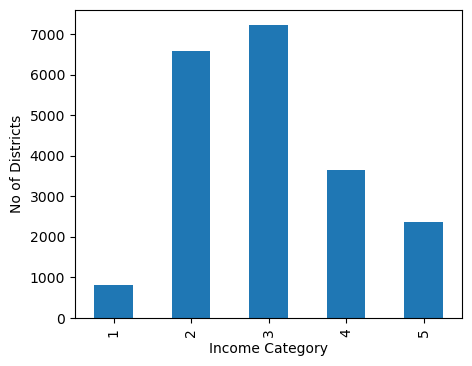

In [23]:
data["income_cat"].value_counts().sort_index().plot.bar(figsize =(5,4))
plt.xlabel("Income Category")
plt.ylabel("No of Districts")
plt.show()

In [29]:
train_set, test_set = train_test_split(data, test_size = 0.2,
                                       stratify = data["income_cat"],
                                     random_state = 42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

In [35]:
# removing the income_cat column as it will not be used again
if "income_cat" in test_set.columns and "income_cat" in train_set.columns:
    train_set.drop(["income_cat"], axis = 1, inplace = True)
    test_set.drop(["income_cat"], axis = 1, inplace = True)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

## 2.2 Creating X_features and y_labels

In [36]:
X_train = train_set.drop(["median_house_value"], axis = 1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop(["median_house_value"], axis = 1)
y_test = test_set["median_house_value"].copy()

X_train.shape, y_train.shape, X_test.shape, y_train.shape

((16512, 9), (16512,), (4128, 9), (16512,))

# 3. Selecting a Model

## 3.1 LinearRegression Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline

lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('linearregression', LinearRegression())])

In [41]:
lin_reg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('linearregression', LinearRegression())])

In [64]:
# Testing the prediction on few training instances
predictions_lin_reg = lin_reg.predict(X_train)

predictions_lin_reg[:5].round(-1) #round to nearest 100

array([242760., 375860., 127480.,  99360., 324610.])

In [65]:
y_train[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

##  3.2 Creating RMSE Metric

In [66]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(np.array([4]),np.array([3]))

1.0

In [67]:
# Rmse of the model predictions
lin_reg_rmse = root_mean_squared_error(y_train,predictions_lin_reg)
lin_reg_rmse

68647.95686706656

**68647 is a very high error**

## 3.3 DecisionTreeRegressor 

In [69]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = make_pipeline(preprocessing,
                             DecisionTreeRegressor(random_state = 42))

decision_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [73]:
decision_tree_predictions = decision_tree.predict(X_train)
decision_tree_rmse = root_mean_squared_error(y_train,decision_tree_predictions)
decision_tree_rmse

0.0

Seems Like the model is overfitting the data and the loss is 0.0.
Evaluationg predictions using Cross-Validation for better measurement

## 3.3 Evaluation using Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score

decision_tree_rmse = -cross_val_score(decision_tree,
                                     X_train, y_train,
                                     scoring = "neg_root_mean_squared_error",
                                     cv = 10) # 10 fold CV

In [76]:
pd.Series(decision_tree_rmse).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

In [80]:
linear_reg_rmse = -cross_val_score(lin_reg, X_train, y_train,
                                  scoring = "neg_root_mean_squared_error",
                                  cv = 10)
pd.Series(linear_reg_rmse).describe()

count       10.000000
mean     69852.836027
std       4081.177634
min      65661.312322
25%      68088.799156
50%      68700.024107
75%      69819.602439
max      80696.030241
dtype: float64

## 3.4 RandomForest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(
    random_state = 42
))
forest_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [83]:
forest_reg_rmse = -cross_val_score(forest_reg, X_train, y_train,
                                  scoring = "neg_root_mean_squared_error",
                                  cv = 10)
pd.Series(forest_reg_rmse).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

In [84]:
forest_reg.fit(X_train, y_train)
forest_reg_predictions = forest_reg.predict(X_train)
forest_reg_rmse_training_error = root_mean_squared_error(y_train,
                                                        forest_reg_predictions)
forest_reg_rmse_training_error

17547.52124624957

The `Cross Validation Error` is validation error and we can see,
for all the models:\
* `Training_error < Validation_error`\
This means that the model has overfitted the training set.

# 4. Fine Tune Model

**Choosing RandomForestRegressor as it was out best model and preforming hyperparameter tuning.**

## 4.1 Grid Search

In [108]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state = 42))
])

# double underscore __ seperates the name of the estimator in our pipeline
# then we mention the parameter_name and give values to check
parameter_grid = [
    {"preprocessing__geo__n_clusters": [5,8,10],
    "random_forest__max_features": [4,6,8]},
    {"preprocessing__geo__n_clusters": [10,15],
    "random_forest__max_features": [6,8,10]}
]

# there are 3*3 + 3*2 = 15 parameter combination
# with cv = 3 we will run 45 times
grid_search = GridSearchCV(full_pipeline,
                          parameter_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 3)
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardize',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function rat...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [109]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardize',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function rat...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [110]:
# List of full Hyperparameters avaibale
# print(full_pipeline.get_params().keys())
len(full_pipeline.get_params().keys())

165

In [119]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [127]:
# looking at the result of grid search
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result.sort_values(by="mean_test_score", ascending = False,
                     inplace = True)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.387900,0.056660,0.087895,0.000313,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43535.728124,-43759.409599,-44567.679666,-43954.272463,443.252861,1
13,4.330609,0.019830,0.087568,0.000100,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44084.115907,-44204.924326,-44862.665796,-44383.902009,342.110841,2
14,5.318305,0.020828,0.087614,0.000328,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44367.841163,-44496.254950,-45199.975902,-44688.024005,365.780976,3
7,3.272138,0.009725,0.086156,0.001277,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44251.874824,-44628.321123,-45857.123289,-44912.439745,685.443021,4
9,3.360462,0.041643,0.086807,0.001330,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44251.874824,-44628.321123,-45857.123289,-44912.439745,685.443021,4


In [128]:
# Looking only at certain columns
cv_result = cv_result[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_result.columns = ["n_clusters", "max_features"] + score_cols
cv_result[score_cols] = -cv_result[score_cols].round().astype(np.int64)

cv_result.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43759,44568,43954
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44252,44628,45857,44912
9,10,6,44252,44628,45857,44912


43k is better than 47k we got previously.

## 4.2 Randomized Search

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": 
                  randint(low = 3, high =50),
                 "random_forest__max_features": 
                  randint(low = 2, high = 20)}
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions = param_distribs,
    cv = 3, scoring = "neg_root_mean_squared_error",
    random_state = 42
)
rnd_search

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardize',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<funct...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10d4cd850>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1637e4080>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [135]:
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardize',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<funct...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10d4cd850>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1637e4080>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [136]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [143]:
# Looking at the result of rnd_search
cv_result = pd.DataFrame(rnd_search.cv_results_)
cv_result.sort_values(by="mean_test_score", ascending = False,
                     inplace = True)
cv_result = cv_result[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_result.columns = ["n_clusters", "max_features"] + score_cols
cv_result[score_cols] = -cv_result[score_cols].round().astype(np.int64)

cv_result.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41099,42150,42701,41983
8,32,7,41604,42200,43219,42341
5,42,4,41798,42967,43536,42767
0,41,16,42106,42743,43459,42769
2,23,8,42422,43108,43832,43121


**Better Result of 41.9k**

**Choosing the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.

# 5. Analyzing the Best Model and the Errors

In [145]:
final_model = rnd_search.best_estimator_ # includes the preporcessing

# looking at the feature importances
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [148]:
sorted(zip(feature_importances, 
          final_model["preprocessing"].get_feature_names_out()),
      reverse = True)

[(0.19087378222226137, 'log__median_income'),
 (0.07625632853052883, 'cat__ocean_proximity_INLAND'),
 (0.06365028932207333, 'bedrooms__ratio'),
 (0.057834740538722625, 'rooms_per_house__ratio'),
 (0.04907003277818634, 'people_per_house__ratio'),
 (0.038165489600129165, 'geo__Cluster3 similarity'),
 (0.025700861301416925, 'geo__Cluster22 similarity'),
 (0.02186407550147744, 'geo__Cluster17 similarity'),
 (0.021818299311019237, 'geo__Cluster6 similarity'),
 (0.018249904787654904, 'geo__Cluster2 similarity'),
 (0.017263517651784216, 'geo__Cluster32 similarity'),
 (0.015649725317935348, 'geo__Cluster18 similarity'),
 (0.015236556682888558, 'geo__Cluster40 similarity'),
 (0.014160249342841777, 'geo__Cluster43 similarity'),
 (0.014113856232349186, 'geo__Cluster7 similarity'),
 (0.013968406769681294, 'geo__Cluster21 similarity'),
 (0.013781633271007265, 'geo__Cluster38 similarity'),
 (0.013515022744382842, 'geo__Cluster34 similarity'),
 (0.013508738042902313, 'geo__Cluster41 similarity'),
 (0

# 6. Evaluating the model on Test Set

In [149]:
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test,final_predictions)
final_rmse

41536.20954091729

## 6.1 Computing 95% confidence invertval for test RMSE

In [ ]:
from scipy import stats

def rmse(squared)